In [91]:
import sys
!{sys.executable} -m pip install nbconvert

In [1]:
# import os
# from sklearn.tree import export_graphviz
# import six
# import pydot
# from sklearn import tree
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in estimator.estimators_:
#     export_graphviz(tree_in_forest,out_file='tree.dot',
#     feature_names=col,
#     filled=True,
#     rounded=True)
#     (graph,) = pydot.graph_from_dot_file('tree.dot')
#     name = 'tree' + str(i_tree)
#     graph.write_png(name+  '.png')
#     os.system('dot -Tpng tree.dot -o tree.png')
#     i_tree +=1

In [1]:
#importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import six
import pydot

from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns

In [6]:
wine_data = pd.read_csv("./Data/wine.data", header = None)
wine_data.columns  = ["Class Label","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines", "Proline"]
wine_data

,Class Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
wine_data.head()

,Class Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_data["Class Label"].nunique()

3

In [10]:
wine_data["Class Label"]

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class Label, Length: 178, dtype: int64

In [22]:
wine_data["Class Label"].value_counts()

2    71
1    59
3    48
Name: Class Label, dtype: int64

In [11]:
"""
    The dataset is relatively balanced, The number of data points per class are not so distant from each other.

"""

#getting the target variable 
X = wine_data.drop('Class Label', axis=1)
y = wine_data['Class Label']

y.shape, X.shape


((178,), (178, 13))

In [75]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [78]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class Label, Length: 178, dtype: int64

In [70]:
#preparing the dataset for a machine learning algorithm
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.25)

In [71]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((133, 13), (133,), (45, 13), (45,))

In [72]:
#scaling the data set
scaler = MinMaxScaler()

sc_x = scaler.fit(x_train)
x_train_scaled = sc_x.transform(x_train.values)
x_test_scaled d5= sc_x.transform(x_test.values)

In [73]:
x_train_scaled.shape

(133, 13)

In [90]:
'''
We are going to run random forest on both the scaled data and the unscaled data to see which performs better
before we go onto tuning parameters

x_train, y_train

x_test, y_pred



'''
rClassifier_1 = RandomForestClassifier()
rClassifier_2 = RandomForestClassifier()

rClassifier_1.fit(x_train,y_train)
y_preds = rClassifier_1.predict(x_test)

rClassifier_2.fit(x_train_scaled,y_train)
y_preds1 = rClassifier_2.predict(x_test_scaled)

print('The accuracy score for Random Forest Unscaled is', accuracy_score( y_test, y_preds)*100,"%")
print('The accuracy score for Random Forest scaled is', accuracy_score(y_test,y_preds1)*100,"%")

The accuracy score for Random Forest Unscaled is 100.0 %
The accuracy score for Random Forest scaled is 100.0 %


In [76]:
"""
    Random Forest Performs extremely well with the wine dataset with both unscaled and scaled data
"""

'\n    Random Forest Performs extremely well with the wine dataset with both unscaled and scaled data\n'

In [56]:
y_preds

array([3, 1, 3, 3, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 2,
       2, 2, 1, 3, 2, 3, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 3, 1, 2, 3, 3,
       2])

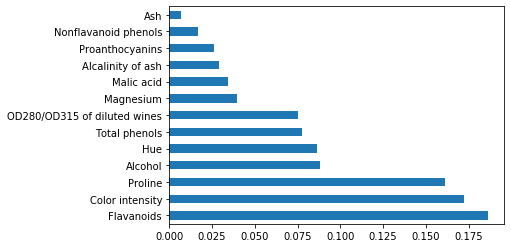

In [80]:
#let us try to visualize the most important features
feat_importances = pd.Series(rClassifier_1.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')

In [ ]:
"""
According to the feature importance chart, 
the most important criteria for predicting the classfier is Flavanoids. 
"""

In [ ]:
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [86]:
X.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

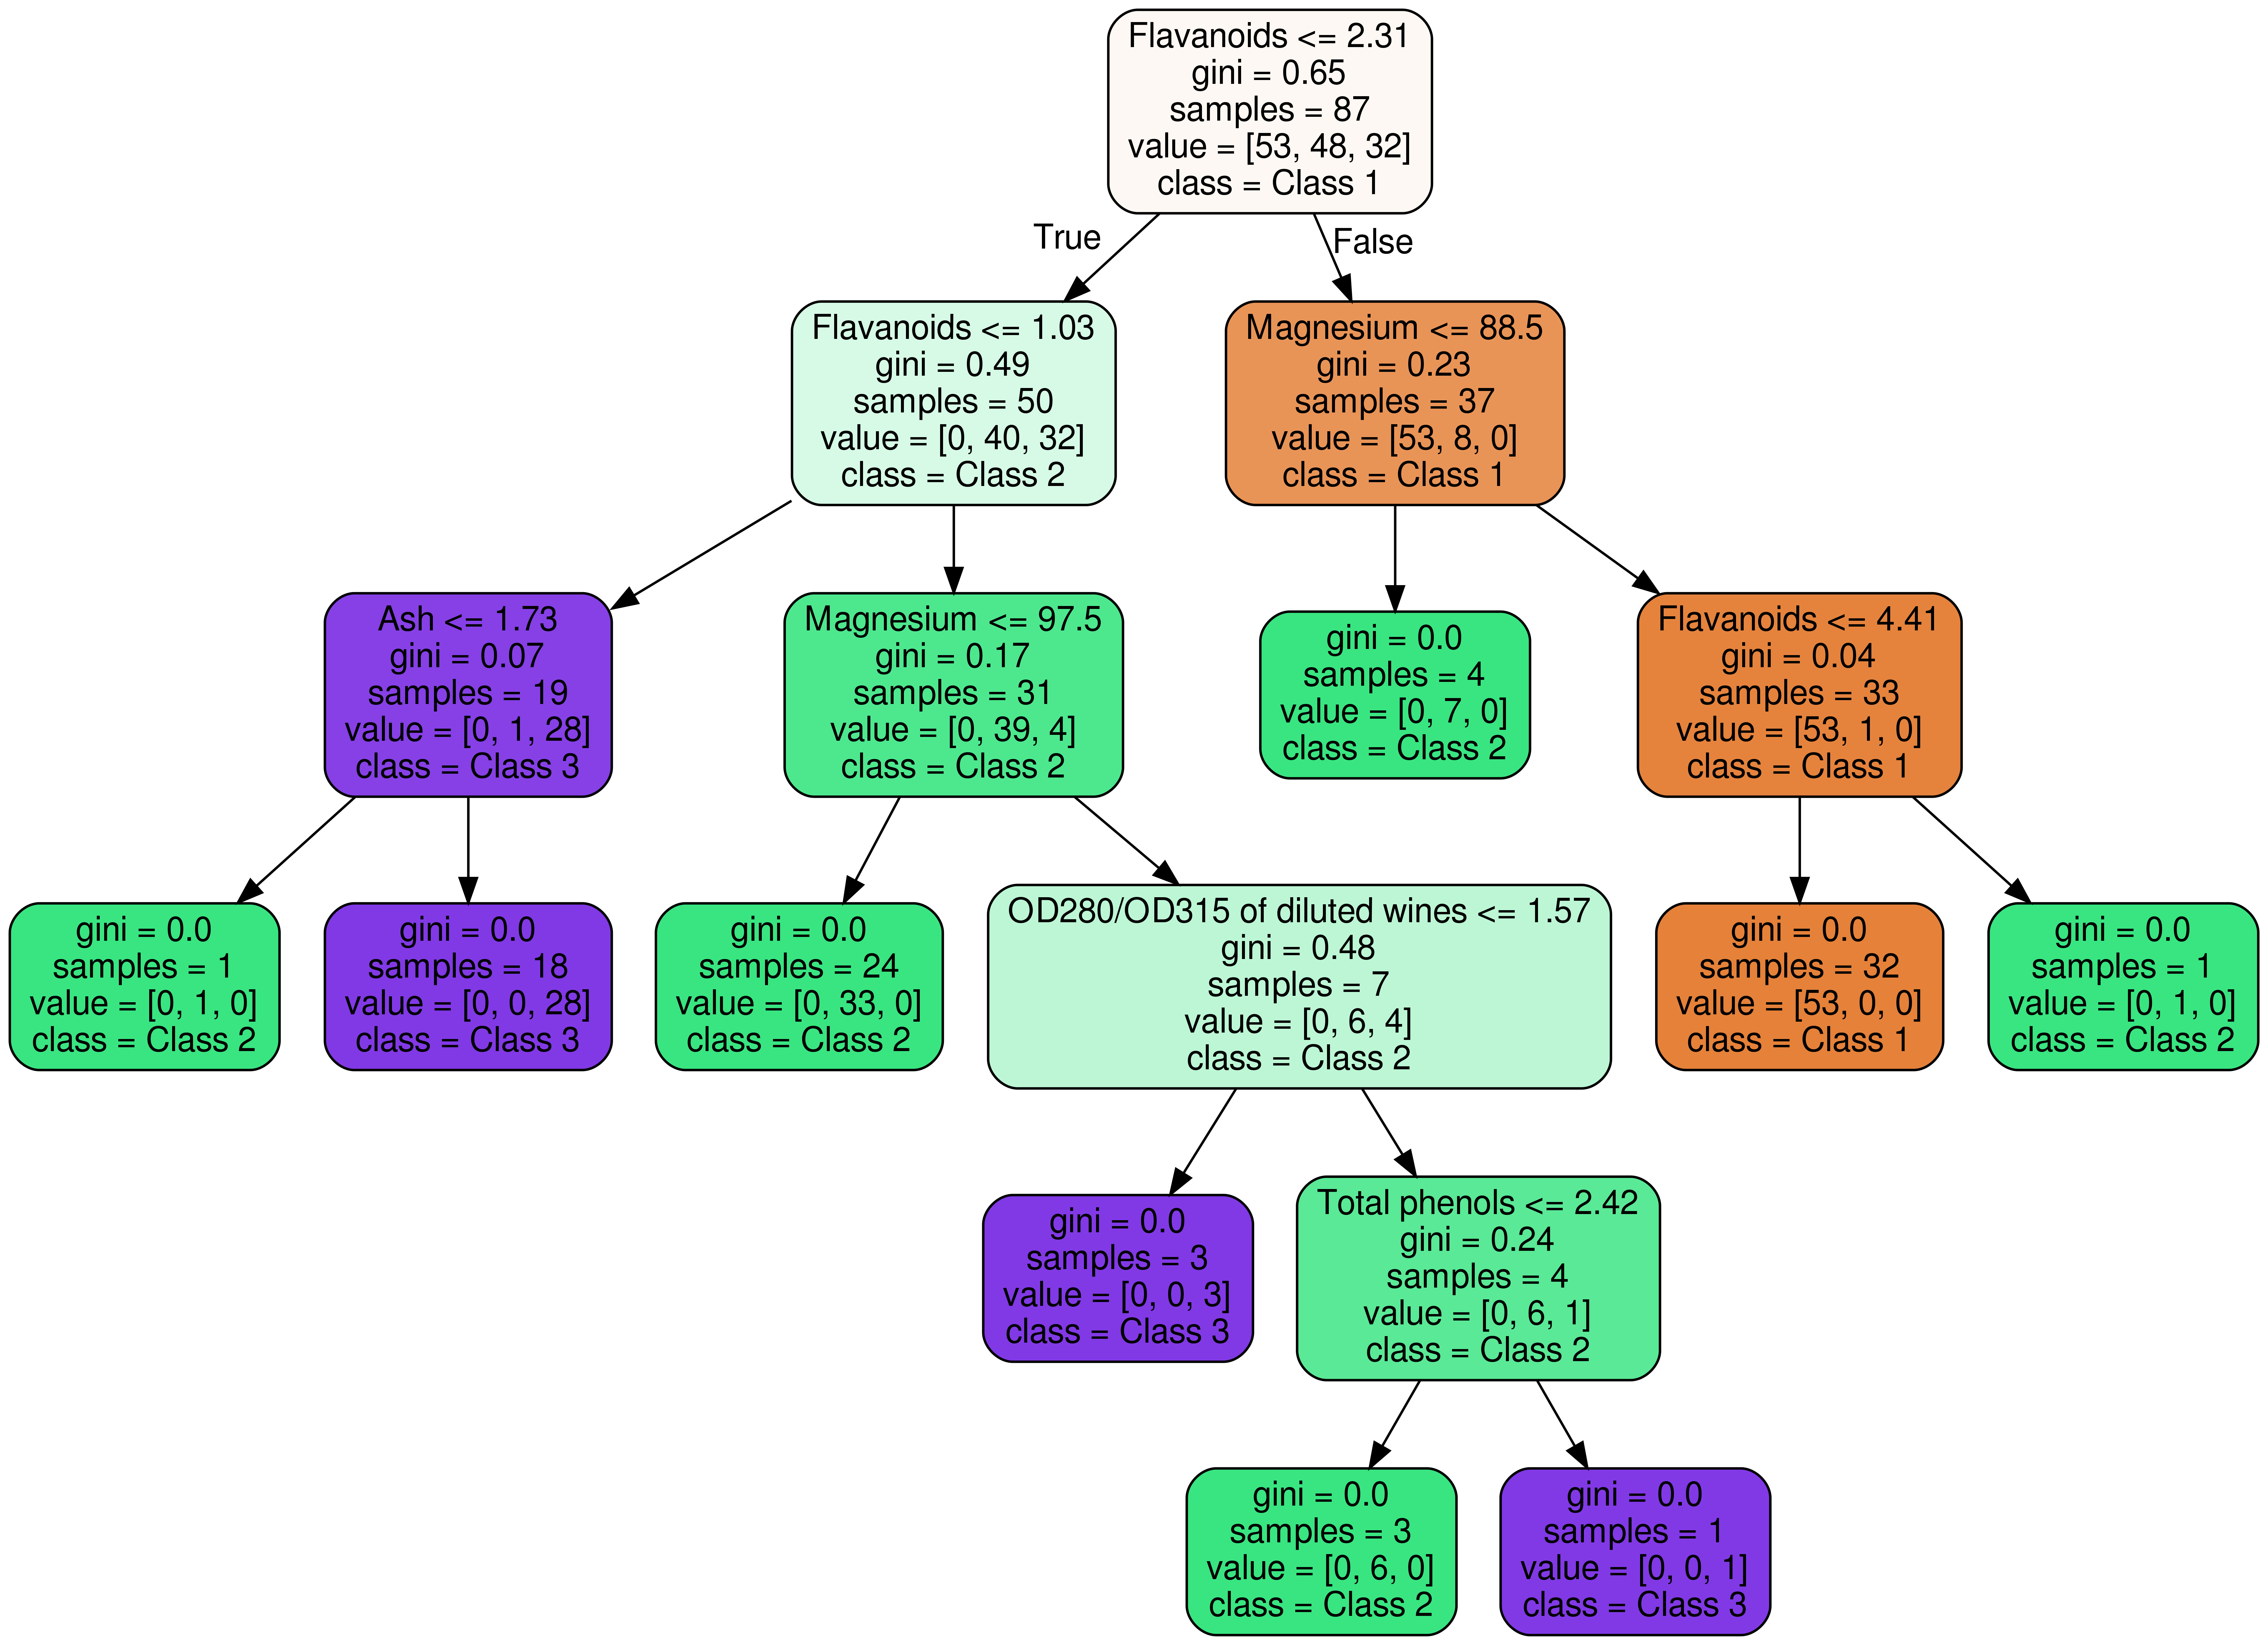

In [88]:
#Visualizing a single tree
estimator = rClassifier_1.estimators_[10]
target_names = ["Class 1", "Class 2", "Class 3"]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')